## Lagrange Multiplier Optimization

When searching for an extrema (minima/maxima) of a function $f(x,y)$ with a constrain $g(x,y)=0$ the method of Lagrange multipliers can be used. Equation $g(x,y)=0$ defines a path, where the valid solutions should lie. This path can be searched for the extremal value of $f(x,y)$ by following the gradient of $f$. The extremal value lies on a point, where the path of $g(x,y)$ is parallel to the contour line (direction of constant height) of $f(x,y)$. Otherwise you could make a step from this point along the path to get an greater or smaller value. <br>
Mathematically this can be written as:
\begin{equation}
\nabla_{x,y} f(x,y) - \lambda \nabla_{x,y} g(x,y) = 0\\
g(x,y) = 0
\end{equation}

with parameter $\lambda$ to correct for the magnitude of gradients of both functions.<br>
above equations are equal to:

\begin{equation}
\mathcal{L}(x,y) = f(x,y) - \lambda g(x,y) \\
\nabla_{x,y,\lambda} \mathcal{L}(x,y) = 0
\end{equation}

An important exception is a local extrema of $f(x,y)$ along the path where the derivative $\nabla f(x,y) = 0$ is zero no matter what.


A simple approach for an arbitrary problem is to approximate the solution numerically using gradient descent.

## example

\begin{align}
f(x,y) &= 0.5x^2 - 0.4y^2 + 0.1x + 0.5y \\
g(x,y) &= 3\cos(2x) - y = 0 \\
\mathcal{L}(x,y) &= f(x,y) - \lambda g(x,y) \\
&= 0.5x^2 - 0.4y^2 + 0.1x + 0.5y - \lambda \Big( 3 \cos(2x) - y \Big) \\
\end{align}

---

\begin{align}
\nabla_x \mathcal{L}(x,y) &= x + 0.1 + 6 \lambda \sin(2x) = 0 \\
\nabla_y \mathcal{L}(x,y) &= - 0.8y + 0.5 + \lambda = 0 \\
\nabla_\lambda \mathcal{L}(x,y) &= - 3 \cos(2x) + y = 0 \\
\end{align}

---


## numerics:
see below<br>
problem: gradient descent works, but condition $g(x)=0$ is getting avoided by descending into $y \rightarrow \pm \infty$

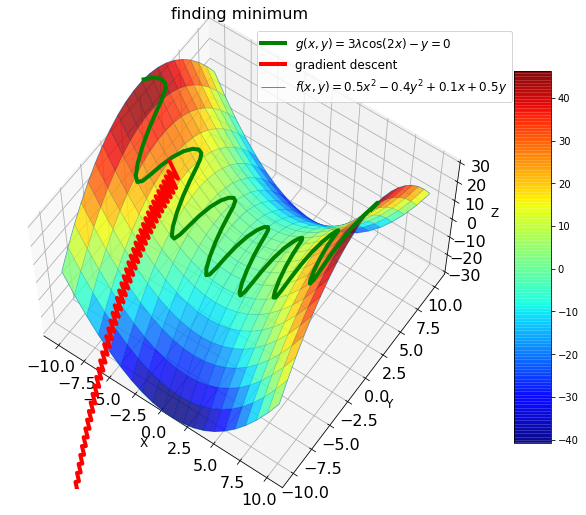

In [177]:
%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

#setup figure
fig = plt.figure(figsize=(12,7))
ax0=plt.subplot(1,1,1, projection='3d')

#energy surface
xmin,xmax = -10,10
ymin,ymax = -10,10
x0 = np.linspace(xmin, xmax, 21)
y0 = np.linspace(ymin, ymax, 21)
xx, yy = np.meshgrid(x0, y0)
f = lambda x,y: 0.5*x**2 - 0.4*y**2 + 0.1*x + 0.5*y
ax0.plot_wireframe(xx,yy,f(xx,yy), linewidth=1, antialiased=True, alpha=0.8, label=r'$f(x,y) = 0.5x^2 - 0.4y^2 + 0.1x + 0.5y$')
forcolorbar1 = ax0.plot_surface(xx,yy,f(xx,yy), cmap=cm.jet, linewidth=0, antialiased=True, alpha=0.8)
fig.colorbar(forcolorbar1, shrink=0.8, aspect=10)

#valid path
x = np.linspace(xmin,xmax,101)
g = lambda x: 3*np.cos(2*x)
y = g(x)
ax0.plot(x,y,f(x,y),color="green", linewidth=4, label=r'$g(x,y) = 3 \lambda \cos(2x) - y = 0$',zorder=10)

#gradient descent
L = lambda x,y,l: 0.5*x**2 - 0.4*y**2 + 0.1*x + 0.5*y - l*(3*np.cos(2*x) - y)
dL_dx = lambda x,y,l: x + 0.1 + 6*l*np.sin(2*x)
dL_dy = lambda x,y,l: - 0.8*y + 0.5 + l
dL_dl = lambda x,y,l: 3*np.cos(2*x) - y
steps = 100
pars = np.array([-7,0,1e+12])
path = np.zeros((3,steps+1))
path[:,0] = pars
step = 1
for s in range(1,steps+1):
    grad = np.array([dL_dx(pars[0],pars[1],pars[2]),dL_dy(pars[0],pars[1],pars[2]),dL_dl(pars[0],pars[1],pars[2])])
    '''print(f(pars[0],pars[1]))
    print(pars)
    print(grad)
    print('-----')'''
    pars = pars - step/np.sum(np.abs(grad))*grad
    path[:,s] = pars
    step = step*0.99
ax0.plot(path[0,:],path[1,:],f(path[0,:],path[1,:]),color="red", linewidth=4, label=r'gradient descent',zorder=10)

#labels
ax0.legend(fontsize=12, bbox_to_anchor=(1.1,1))
ax0.set_title('finding minimum', fontsize=16)
ax0.set_xlabel('X', fontsize=12)
ax0.set_ylabel('Y', fontsize=12)
ax0.set_zlabel('Z', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)

#dimensions & ticks
ax0.set_xlim(xmin-1,xmax+1)
ax0.set_ylim(xmin-1,xmax+1)
ax0.set_zlim(-30, 30)
ax0.grid(True)
#ax0.axis('equal')
ax0.view_init(elev=60, azim=-55)
#fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()

## numerics:
this example works, because $f(x,y)$ is bounded. <br>
be aware, in numerics $-g(x,y)=0$ can produce completly different results, than $g(x,y)=0$ <br>
why ?

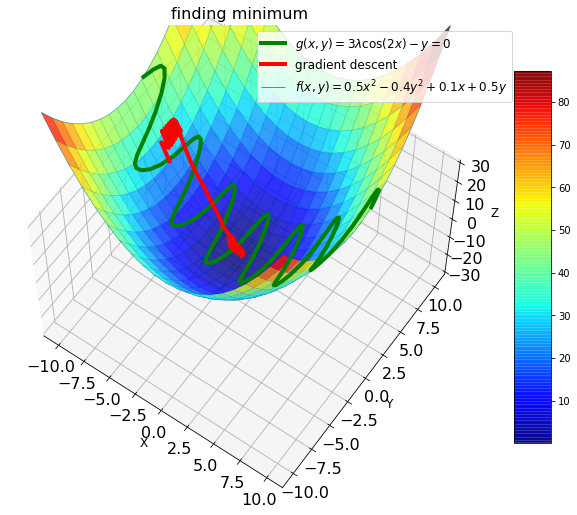

In [182]:
%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

#setup figure
fig = plt.figure(figsize=(12,7))
ax0=plt.subplot(1,1,1, projection='3d')

#energy surface
xmin,xmax = -10,10
ymin,ymax = -10,10
x0 = np.linspace(xmin, xmax, 21)
y0 = np.linspace(ymin, ymax, 21)
xx, yy = np.meshgrid(x0, y0)
f = lambda x,y: 0.5*x**2 + 0.4*y**2 + 0.1*x + 0.5*y
ax0.plot_wireframe(xx,yy,f(xx,yy), linewidth=1, antialiased=True, alpha=0.8, label=r'$f(x,y) = 0.5x^2 - 0.4y^2 + 0.1x + 0.5y$')
forcolorbar1 = ax0.plot_surface(xx,yy,f(xx,yy), cmap=cm.jet, linewidth=0, antialiased=True, alpha=0.8)
fig.colorbar(forcolorbar1, shrink=0.8, aspect=10)

#valid path
x = np.linspace(xmin,xmax,101)
g = lambda x: 3*np.cos(2*x)
y = g(x)
ax0.plot(x,y,f(x,y),color="green", linewidth=4, label=r'$g(x,y) = 3 \lambda \cos(2x) - y = 0$',zorder=10)

#gradient descent
L = lambda x,y,l: 0.5*x**2 + 0.4*y**2 + 0.1*x + 0.5*y - l*(3*np.cos(2*x) - y)
dL_dx = lambda x,y,l: x + 0.1 + 6*l*np.sin(2*x)
dL_dy = lambda x,y,l: + 0.8*y + 0.5 + l
dL_dl = lambda x,y,l: 3*np.cos(2*x) - y
steps = 500
pars = np.array([-7,0,-5])
path = np.zeros((3,steps+1))
path[:,0] = pars
step = 1
for s in range(1,steps+1):
    grad = np.array([dL_dx(pars[0],pars[1],pars[2]),dL_dy(pars[0],pars[1],pars[2]),dL_dl(pars[0],pars[1],pars[2])])
    '''print(f(pars[0],pars[1]))
    print(pars)
    print(grad)
    print('-----')'''
    pars = pars - step/np.sum(np.abs(grad))*grad
    path[:,s] = pars
    step = step*0.99
ax0.plot(path[0,:],path[1,:],f(path[0,:],path[1,:]),color="red", linewidth=4, label=r'gradient descent',zorder=10)

#labels
ax0.legend(fontsize=12, bbox_to_anchor=(1.1,1))
ax0.set_title('finding minimum', fontsize=16)
ax0.set_xlabel('X', fontsize=12)
ax0.set_ylabel('Y', fontsize=12)
ax0.set_zlabel('Z', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)

#dimensions & ticks
ax0.set_xlim(xmin-1,xmax+1)
ax0.set_ylim(xmin-1,xmax+1)
ax0.set_zlim(-30, 30)
ax0.grid(True)
#ax0.axis('equal')
ax0.view_init(elev=60, azim=-55)
#fig.gca().set_autoscale_on(False)
plt.tight_layout()
plt.show()